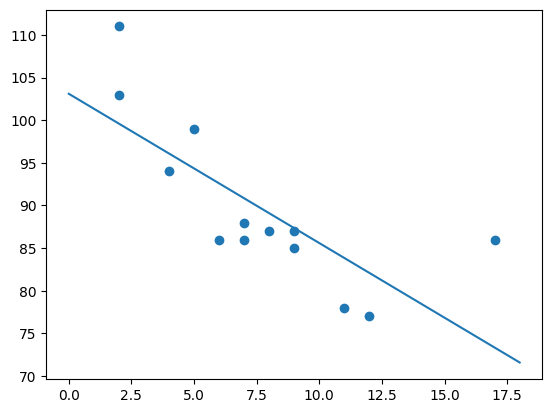

In [4]:
# liner regression
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

slope, intercept, r, p, std_err = stats.linregress(x,y)

def myfunc(x):
    return slope * x + intercept

xx = np.linspace(0, 18, 180)
yy = slope * xx +intercept

plt.scatter(x,y)
plt.plot(xx,yy)
plt.show()

In [5]:
import numpy as np

In [6]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [9]:
def numerical_derivative(f,x):
    delta_x=1e-4
    gradf=np.zeros_like(x)

    it = np.nditer(x,flags=['multi_index'], op_flags=['readwrite'])

    while not it.finished:
        idx=it.multi_index
        tmp_val=x[idx]
        x[idx]=float(tmp_val)+delta_x
        fx1=f(x)

        x[idx]=float(tmp_val)-delta_x
        fx2=f(x)
        gradf[idx]=(fx1-fx2)/(2*delta_x)

        x[idx]=tmp_val
        it.iternext()
    return gradf

class logicGate:
    def __init__(self,gate_name,xdata,tdata,learning_rate=0.01,threshold=0.5):
        self.name = gate_name

        self.__xdata=xdata.reshape(4,2)
        self.__tdata=tdata.reshape(4,1)

        self.__w=np.random.rand(2,1)
        self.__b=np.random.rand(1)

        self.__learning_rate=learning_rate
        self.__threshold=threshold

    def __loss_func(self):
        delta=1e-7

        z=np.dot(self.__xdata,self.__w)+self.__b
        y=sigmoid(z)

        return -np.sum(self.__tdata*np.log(y+delta)+(1-self.__tdata)*np.log((1-y)+delta))

    def err_val(self):
        delta=1e-7

        z=np.dot(self.__xdata, self.__w)+self.__b
        y=sigmoid(z)

        return -np.sum(self.__tdata*np.log(y+delta)+(1-self.__tdata)*np.log((1-y)+delta))

    def train(self):
        f = lambda x : self.__loss_func()

        print("init error : ", self.err_val())

        for stp in range(20000):
            self.__w -= self.__learning_rate * numerical_derivative(f,self.__w)
            self.__b -= self.__learning_rate * numerical_derivative(f,self.__b)

            if (stp%2000 == 0):
                print("step : ",stp, "error : ",self.err_val())

    def predict(self, input_data):

        z=np.dot(input_data,self.__w)+self.__b
        y=sigmoid(z)

        if y[0] > self.__threshold:
            result = 1
        else:
            result = 0

        return y, result

In [15]:
# OR
xdata = np.array([[0,0],[0,1],[1,0],[1,1]])
tdata = np.array([[0,1,1,1]])

AND_gate=logicGate("AND_GATE",xdata,tdata,)
AND_gate.train()

for in_data in xdata:
    (sig_val,logic_val)=AND_gate.predict(in_data)
    print(in_data," : ",logic_val)

init error :  1.6127993738805184
step :  0 error :  1.610831401789295
step :  2000 error :  0.4169630425857274
step :  4000 error :  0.22800963544138395
step :  6000 error :  0.15493979155801654
step :  8000 error :  0.11678286999039894
step :  10000 error :  0.09349649617447954
step :  12000 error :  0.07785746048838377
step :  14000 error :  0.06665129179740882
step :  16000 error :  0.0582371915328158
step :  18000 error :  0.05169242904950251
[0 0]  :  0
[0 1]  :  1
[1 0]  :  1
[1 1]  :  1


In [13]:
# NAND
xdata = np.array([[0,0],[0,1],[1,0],[1,1]])
tdata = np.array([[1,0,0,0]])

AND_gate=logicGate("AND_GATE",xdata,tdata,)
AND_gate.train()

for in_data in xdata:
    (sig_val,logic_val)=AND_gate.predict(in_data)
    print(in_data," : ",logic_val)

init error :  4.8769253920819295
step :  0 error :  4.793566209381918
step :  2000 error :  0.44596695951072685
step :  4000 error :  0.2369695261652839
step :  6000 error :  0.1591396127544827
step :  8000 error :  0.11918843043376111
step :  10000 error :  0.09504622767526684
step :  12000 error :  0.07893581797671542
step :  14000 error :  0.0674435333814884
step :  16000 error :  0.05884316528868012
step :  18000 error :  0.0521705529329434
[0 0]  :  1
[0 1]  :  0
[1 0]  :  0
[1 1]  :  0


[-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]
[-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]
[[-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]
 [-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]
 [-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]
 [-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]
 [-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]
 [-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]
 [-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]
 [-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]
 [-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]
 [-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]
 [-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]]
[[-2.  -2.  -2.  -2.  -2.  -2.  -2.  -2.  -2.  -2.  -2. ]
 [-1.6 -1.6 -1.6 -1.6 -1.6 -1.6 -1.6 -1.6 -1.6 -1.6 -1.6]
 [-1.2 -1.2 -1.2 -1.2 -1.2 -1.2 -1.2 -1.2 -1.2 -1.2 -1.2]
 [-0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8]
 [-0.4 -0.4 -0.

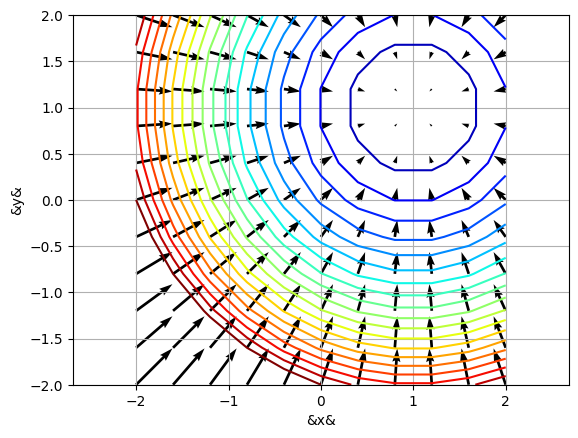

In [18]:
x = np.linspace(-2,2,11)
y = np.linspace(-2,2,11)

print(x)
print(y)

x, y = np.meshgrid(x,y)
print(x)
print(y)

f = lambda x,y : (x-1)**2 + (y-1)**2
z = f(x,y)
print(z)

from mpl_toolkits.mplot3d import Axes3D
grad_f_x = lambda x, y : 2 * (x-1)
grad_f_y = lambda x, y : 2 * (y-1)

dz_dx = grad_f_x(x,y)
dz_dy = grad_f_y(x,y)

ax = plt.axes()
ax.contour(x,y,z,levels=np.linspace(0,10,20), cmap = plt.cm.jet)
ax.quiver(x,y,-dz_dx,-dz_dy)
ax.grid()
ax.axis('equal')
ax.set_xlabel('&x&')
ax.set_ylabel('&y&')
plt.show()

In [19]:
def f(x):
    return x**2 - 4*x + 6

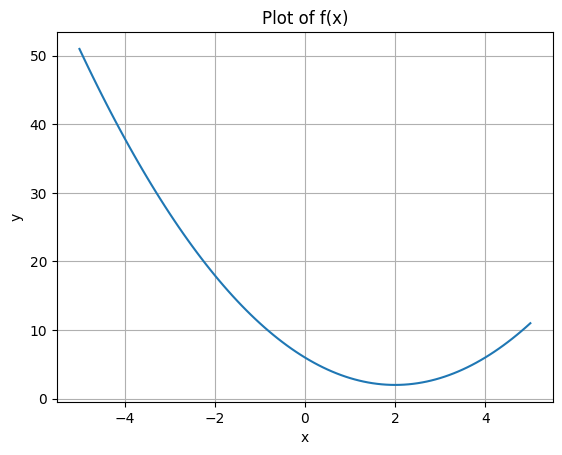

In [20]:
NumberOfPoints = 101
x = np. linspace(-5,5,NumberOfPoints)
fx = f(x)
plt.plot(x,fx)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title("Plot of f(x)")
plt.show()

In [21]:
xid = np.argmin(fx)
xopt = x[xid]
print(xopt,f(xopt))

2.0 2.0


In [40]:
def f(x):
    return x**2 - 4*x + 6

def grad_fx(x):
    return 2*x - 4

def steepest_descent(func, grad_func, x0, learning_rate=0.01, Maxiter=10, verbose=True):
    paths = []
    for i in range(Maxiter):
        x1 = x0 - learning_rate * grad_func(x0)
        if verbose:
            print('{0:03d} : {1:4.3f} : {2:4.2E}'.format(i, x1, func(x1)))
        x0 = x1
        paths.append(x0)
    return x0, func(x0), paths

In [41]:
xopt, fopt, paths = steepest_descent(f, grad_fx, 1.0, learning_rate=1.0)

000 : 3.000 : 3.00E+00
001 : 1.000 : 3.00E+00
002 : 3.000 : 3.00E+00
003 : 1.000 : 3.00E+00
004 : 3.000 : 3.00E+00
005 : 1.000 : 3.00E+00
006 : 3.000 : 3.00E+00
007 : 1.000 : 3.00E+00
008 : 3.000 : 3.00E+00
009 : 1.000 : 3.00E+00


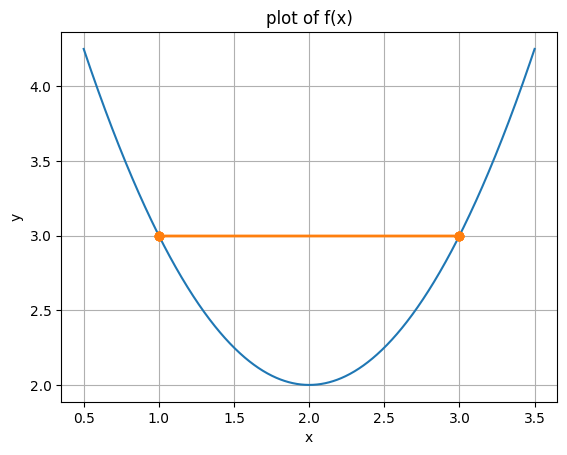

In [42]:
x = np.linspace(0.5, 3.5, 1000)
paths = np.array(paths)
plt.plot(x, f(x))
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('plot of f(x)')

plt.plot(paths, f(paths), 'o-')
plt.show()

000 : 4.800 : 9.84E+00
001 : -1.920 : 1.74E+01
002 : 7.488 : 3.21E+01
003 : -5.683 : 6.10E+01
004 : 12.756 : 1.18E+02
005 : -13.059 : 2.29E+02
006 : 23.083 : 4.46E+02
007 : -27.516 : 8.73E+02
008 : 43.322 : 1.71E+03
009 : -55.851 : 3.35E+03


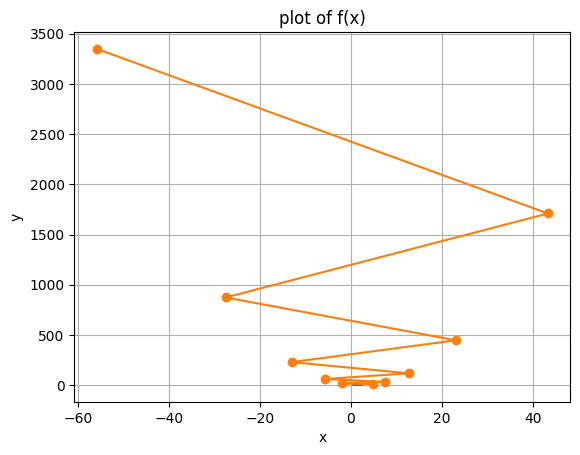

In [43]:
xopt, fopt, paths = steepest_descent(f, grad_fx, 0.0, learning_rate=1.2)
x = np.linspace(0.5, 2.5, 1000)
paths = np.array(paths)
plt.plot(x, f(x))
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('plot of f(x)')

plt.plot(paths, f(paths), 'o-')
plt.show()

000 : 1.020 : 2.96E+00
001 : 1.040 : 2.92E+00
002 : 1.059 : 2.89E+00
003 : 1.078 : 2.85E+00
004 : 1.096 : 2.82E+00
005 : 1.114 : 2.78E+00
006 : 1.132 : 2.75E+00
007 : 1.149 : 2.72E+00
008 : 1.166 : 2.70E+00
009 : 1.183 : 2.67E+00


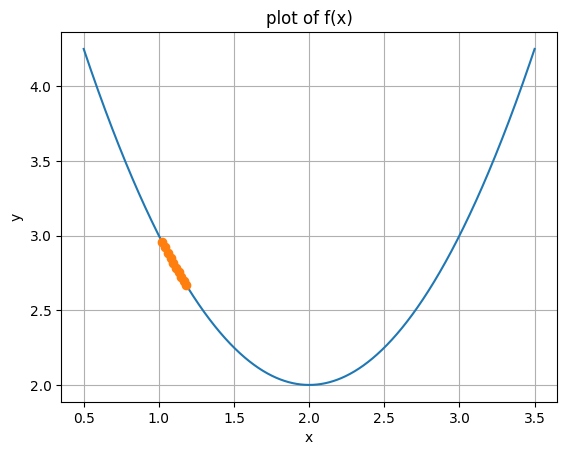

In [48]:
xopt, fopt, paths = steepest_descent(f, grad_fx, 1.0, learning_rate=0.01)
x = np.linspace(0.5, 3.5, 1000)
paths = np.array(paths)
plt.plot(x, f(x))
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('plot of f(x)')

plt.plot(paths, f(paths), 'o-')
plt.show()

000 : 2.800 : 2.64E+00
001 : 1.360 : 2.41E+00
002 : 2.512 : 2.26E+00
003 : 1.590 : 2.17E+00
004 : 2.328 : 2.11E+00
005 : 1.738 : 2.07E+00
006 : 2.210 : 2.04E+00
007 : 1.832 : 2.03E+00
008 : 2.134 : 2.02E+00
009 : 1.893 : 2.01E+00


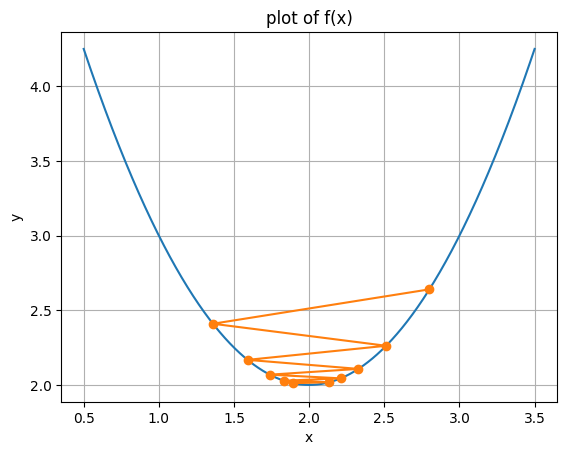

In [47]:
xopt, fopt, paths = steepest_descent(f, grad_fx, 1.0, learning_rate=0.9)
x = np.linspace(0.5, 3.5, 1000)
paths = np.array(paths)
plt.plot(x, f(x))
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('plot of f(x)')

plt.plot(paths, f(paths), 'o-')
plt.show()